In [147]:
# coding: utf-8
import warnings
warnings.filterwarnings('ignore')
import time
import os
import numpy as np
import keras
from keras import metrics
from keras.utils import to_categorical
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Flatten, Reshape, Concatenate
from keras.layers import Conv2D, Conv1D, MaxPooling1D, MaxPooling2D,Activation
from keras.layers import SimpleRNN, GRU,Activation, LSTM

from keras.layers.embeddings import Embedding
from datetime import datetime
from gensim.models import word2vec
from collections import *
import pandas as pd
import matplotlib.pyplot as plt

In [148]:
def text_to_index(corpus):
    new_corpus = []
    for doc in corpus:
        new_doc = []
        for word in doc:
            try:
                new_doc.append(word2idx[word])
            except:
                new_doc.append(0)
#         new_doc_arr = np.array(new_doc).reshape(1, max_doc_word_length)
        new_doc_arr = np.array(new_doc)
        new_corpus.append( new_doc_arr)
    return np.array(new_corpus)

In [149]:
# get data
# get texts data
category2idx = {'AllTogether': 0, 'Baseball': 1, 'Boy-Girl': 2, 'C_chat':  3, 'CVS': 4,
                  'GameSale': 5, 'GetMarry': 6, 'Lifeismoney': 7, 'LoL': 8, 'MH': 9, 'MLB': 10, 'Mobilecomm': 11, 
                'movie': 12,'MuscleBeach':  13, 'NBA': 14,  'SENIORHIGH': 15, 'Stock': 16, 
                'Tennis': 17, 'Tos': 18, 'WomenTalk': 19}

train_df_sample = pd.read_pickle('train_reduce.pkl').sample(frac=1, random_state=123)
train_texts = train_df_sample.ari_title
label_list = train_df_sample.price

test_pickle_df = pd.read_pickle('train_reduce.pkl')
test_texts = test_pickle_df["ari_title"].values

train_texts_list = []
for text in train_texts:
    train_texts_list.append(text[0])
    
texts_list = []
for text in train_texts_list:
    texts_list.append(text)
    
for text in test_texts:
    texts_list.append(text)

In [150]:
# get word embedding vector
answer = word2vec.Word2Vec.load("word2vec.model")
word_vectors = answer.wv
wvv = word_vectors.vocab
wvv_keys = wvv.keys()
wvv_keys_list = list(wvv_keys)

vocab_num = len(wvv.items()) + 1

vocab_list = [(word, word_vectors[word]) for word, _ in wvv.items()]

In [151]:
del word_vectors, wvv, train_texts_list, answer

In [152]:
word_vec_len = 50
embedding_matrix = np.zeros((vocab_num , word_vec_len))
word2idx = {}

for i, vocab in enumerate(vocab_list):
    word, vec = vocab
    embedding_matrix[i + 1] = vec
    word2idx[word] = i + 1

In [153]:
embedding_matrix.shape

(46, 50)

In [154]:
embedding_layer = Embedding( input_dim= embedding_matrix.shape[0],output_dim= 50, weights=[embedding_matrix], 
                            input_length = 200,trainable=False)
# model = getModel(embedding_layer, image_width, image_height, input_channel)
# model.add(Conv1D(100, 3,padding = 'same', ))
# model.add(Flatten())
# model.add(Dense(2, activation='softmax'))
# model.compile(loss='mean_squared_error', optimizer='sgd')

model = Sequential()
model.add(embedding_layer)
model.add(LSTM(16))    
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
# model.add(Dense(2, activation='softmax'))
# model.compile(optimizer='sgd',loss='mean_squared_error',  metrics=["accuracy"])
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 200, 50)           2300      
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                4288      
_________________________________________________________________
dense_11 (Dense)             (None, 40)                680       
_________________________________________________________________
dense_12 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 21        
Total params: 8,109
Trainable params: 5,809
Non-trainable params: 2,300
_________________________________________________________________


In [167]:
max_doc_word_length = 200

x_trains_texts = train_df_sample.ari_title.append(test_pickle_df.ari_title)
X_train_texts = text_to_index(x_trains_texts)
X_train = pad_sequences(X_train_texts, maxlen= max_doc_word_length)

print(x_trains_texts.shape)
print(len(label_list))

Y_label_list = np.zeros((6577, 1))
for ids in range(0, 6577):
    Y_label_list[ids]  = label_list[ids] 
print(Y_label_list.shape)

(13154,)
6577
(6577, 1)


In [176]:
history = model.fit(x = X_train[0:6377], y = Y_label_list[0:6377],  
                    batch_size= 100,  epochs = 200, verbose = 1)

Epoch 1/200
6377/6377 [==============================] - 9s 1ms/step - loss: 0.3428 - acc: 0.8493
Epoch 2/200
6377/6377 [==============================] - 9s 1ms/step - loss: 0.3466 - acc: 0.8418
Epoch 3/200
6377/6377 [==============================] - 9s 1ms/step - loss: 0.3392 - acc: 0.8460
Epoch 4/200
6377/6377 [==============================] - 12s 2ms/step - loss: 0.3403 - acc: 0.8435
Epoch 5/200
6377/6377 [==============================] - 8s 1ms/step - loss: 0.3400 - acc: 0.8482
Epoch 6/200
6377/6377 [==============================] - 10s 2ms/step - loss: 0.3397 - acc: 0.8449
Epoch 7/200
6377/6377 [==============================] - 8s 1ms/step - loss: 0.3373 - acc: 0.8416
Epoch 8/200
6377/6377 [==============================] - 8s 1ms/step - loss: 0.3368 - acc: 0.8465
Epoch 9/200
6377/6377 [==============================] - 8s 1ms/step - loss: 0.3375 - acc: 0.8460
Epoch 10/200
6377/6377 [==============================] - 12s 2ms/step - loss: 0.3333 - acc: 0.8493
Epoch 11/200
637

6377/6377 [==============================] - 7s 1ms/step - loss: 0.2712 - acc: 0.8794
Epoch 84/200
6377/6377 [==============================] - 7s 1ms/step - loss: 0.2721 - acc: 0.8832
Epoch 85/200
6377/6377 [==============================] - 7s 1ms/step - loss: 0.2654 - acc: 0.8862
Epoch 86/200
6377/6377 [==============================] - 7s 1ms/step - loss: 0.2726 - acc: 0.8810
Epoch 87/200
6377/6377 [==============================] - 7s 1ms/step - loss: 0.2652 - acc: 0.8811
Epoch 88/200
6377/6377 [==============================] - 7s 1ms/step - loss: 0.2710 - acc: 0.8862
Epoch 89/200
6377/6377 [==============================] - 7s 1ms/step - loss: 0.2859 - acc: 0.8720
Epoch 90/200
6377/6377 [==============================] - 7s 1ms/step - loss: 0.2652 - acc: 0.8841
Epoch 91/200
6377/6377 [==============================] - 7s 1ms/step - loss: 0.2767 - acc: 0.8766
Epoch 92/200
6377/6377 [==============================] - 7s 1ms/step - loss: 0.2645 - acc: 0.8857
Epoch 93/200
6377/6377 

6377/6377 [==============================] - 7s 1ms/step - loss: 0.2232 - acc: 0.9048
Epoch 166/200
6377/6377 [==============================] - 7s 1ms/step - loss: 0.2290 - acc: 0.9026
Epoch 167/200
6377/6377 [==============================] - 7s 1ms/step - loss: 0.2220 - acc: 0.9059
Epoch 168/200
6377/6377 [==============================] - 7s 1ms/step - loss: 0.2199 - acc: 0.9083
Epoch 169/200
6377/6377 [==============================] - 7s 1ms/step - loss: 0.2309 - acc: 0.9025
Epoch 170/200
6377/6377 [==============================] - 7s 1ms/step - loss: 0.2319 - acc: 0.8989
Epoch 171/200
6377/6377 [==============================] - 7s 1ms/step - loss: 0.2276 - acc: 0.9007
Epoch 172/200
6377/6377 [==============================] - 7s 1ms/step - loss: 0.2234 - acc: 0.9045
Epoch 173/200
6377/6377 [==============================] - 7s 1ms/step - loss: 0.2157 - acc: 0.9065
Epoch 174/200
6377/6377 [==============================] - 7s 1ms/step - loss: 0.2065 - acc: 0.9152
Epoch 175/200


accuracy 準確度: 


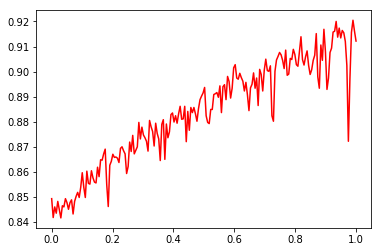

loss 損失函數: 


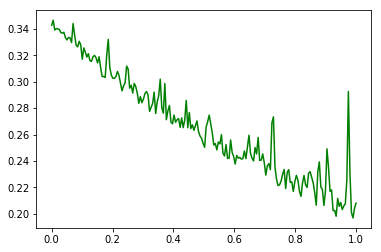

In [177]:
np_loss_history = np.array(history.history['loss'])
np.savetxt("loss_history.txt", np_loss_history, delimiter=",")
loss_history = np.loadtxt("loss_history.txt")

np_acc_history = np.array(history.history['acc'])
np.savetxt("acc_history.txt", np_acc_history, delimiter=",")
acc_history = np.loadtxt("acc_history.txt")

print("accuracy 準確度: ")
fig = plt.figure(1)
ax = plt.axes()
x = np.linspace(0, 1, acc_history.shape[0])
plt.plot(x, acc_history, '-r');  # dotted red
plt.show()


print("loss 損失函數: ")
fig = plt.figure(2)
ax = plt.axes()
x = np.linspace(0, 1, loss_history.shape[0])
plt.plot(x, loss_history, '-g');  # dotted red
plt.show()

In [178]:
# model.save('my_model.h5') 

In [179]:
# evaluate the model
loss_accuracy = model.evaluate(X_train[0:100], Y_label_list[0:100], verbose=1)
print(type(loss_accuracy), loss_accuracy)

test_sequences1 = X_train[6377:6577]

predict_res = model.predict(test_sequences1, batch_size= 100, verbose=0)

# final_res = []
# for pre_res in predict_res:
#     final_res.append(pre_res)
# print(predict_res[0:20])

100/100 [==============================] - 0s 1ms/step
<class 'list'> [0.20700247049331666, 0.9]


In [180]:
# 格式化輸出結果成 1 和 0
# 預測結果小於0.5的保存爲0,表示判斷爲會下跌。否則表示上漲或有限小數位的不變。
final_res = []
for value in predict_res:
    final_res.append(int(round(value[0])))

RIGHT_INDEX= 10
for pv,fv in zip(predict_res[0:RIGHT_INDEX], final_res[0:RIGHT_INDEX]):
    print( repr(pv[0]).ljust(15)[:4] , repr(fv).rjust(3)) 

# print(final_res[:20])

0.99   1
0.98   1
0.02   0
0.99   1
0.99   1
0.78   1
0.24   0
0.98   1
0.29   0
0.94   1


In [184]:
# 和真實的股票指數變化比較，輸出預測的準確率
x1 = final_res[100:]
x2 = []
for val in Y_label_list[6477:]:
    x2.append(val[0])

acc_i = 0
for v1,v2 in zip(x1, x2):
    compare_res = (v1 == v2)
#     print(compare_res)
    if compare_res:
        acc_i += 1
print("預測準確率爲： ", acc_i / len(x1))
# print(type(x1), type(x2), x2)

預測準確率爲：  0.49


In [182]:
# # result_txt = "result" + str(datetime.now()).split()[1] + ".txt"
# print(len(final_res))
# result_txt = "local_result001" + ".txt"
# ids = 0
# with open(result_txt, 'w') as out:
#     out.write("id,pre_price" + '\n')
#     for value in final_res:
#         out.write(str(ids) + "," + str(int (round(value[0]))) + "," + str(int (round(value[0]))) + '\n')
#         ids += 1